In [8]:
pip install rasterio

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Importing packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import rasterio

In [2]:
## Opening Bathymetry
filepath_asc = 'bathy_asc_lake_crescent.asc'

## Converted to a Numpy Array
dn = np.genfromtxt(filepath_asc, skip_header = 6, dtype = float, delimiter = ' ')

In [10]:
## Opening acoustic backscatter file
filepath_tif = 'back_tif_lake_crescent.tif'
img = rasterio.open(filepath_tif)
#credit: https://stackoverflow.com/questions/44534009/plotting-with-rasterio

/opt/conda/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [3]:
# Setting up NumPy Array
x = np.arange(431687, 444833, 3)
y = np.arange(5321907, 5327181, 3)
print(x)
print('x:', len(x))
print('y:', len(y))

[431687 431690 431693 ... 444824 444827 444830]
x: 4382
y: 1758


In [4]:
# Converting Numpy Array to xr
data_xr = xr.DataArray(data = dn, dims = ['y', 'x'], coords = {'x':x, 'y':y})
# Taking out -9999 variables
data_xr = data_xr.where(data_xr != -9999)
display(data_xr)

<xarray.DataArray (y: 1758, x: 4382)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * x        (x) int64 431687 431690 431693 431696 ... 444824 444827 444830
  * y        (y) int64 5321907 5321910 5321913 ... 5327172 5327175 5327178

/tmp/ipykernel_260/2221674839.py:7: UserWarning: The following kwargs were not used by contour: 'linewith'
  cntr_lines = plt.contour(x, y, data_xr, colors = 'black', levels = 5, linewith = 1)


<a list of 13 text.Text objects>

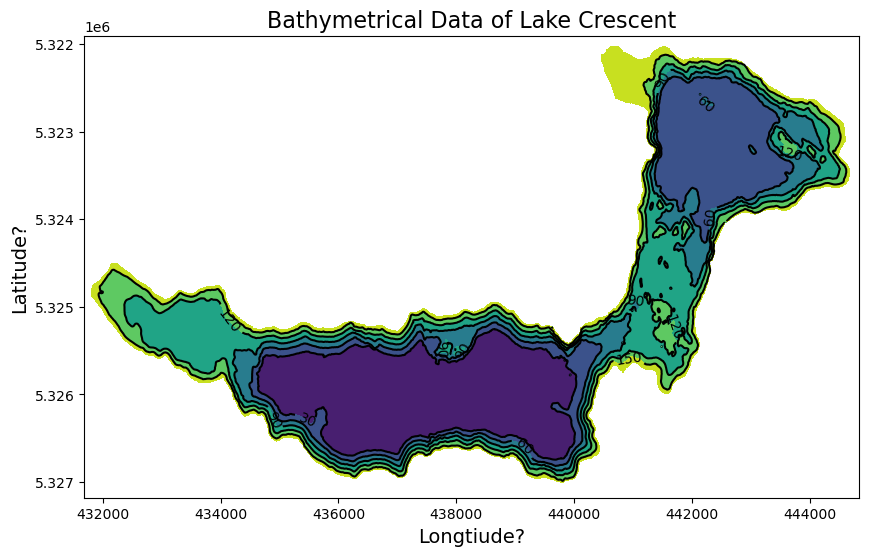

In [5]:
# Bathymetry
## Kathy's Feedback - bathymetry for contour and color for acoustic backscatter
fig, ax = plt.subplots(figsize = (10,6))
ax = plt.gca()

cntr = plt.contourf(x, y, data_xr, cmap = 'viridis', levels = 5) 
cntr_lines = plt.contour(x, y, data_xr, colors = 'black', levels = 5, linewith = 1)
plt.xlabel('Longtiude?', fontsize = 14)
plt.ylabel('Latitude?', fontsize = 14)
plt.title('Bathymetrical Data of Lake Crescent', fontsize = 16)
ax.invert_yaxis()
plt.clabel(cntr_lines)

Text(0.5, 1.0, 'Acoustic Backscatter Data of Lake Crescent')

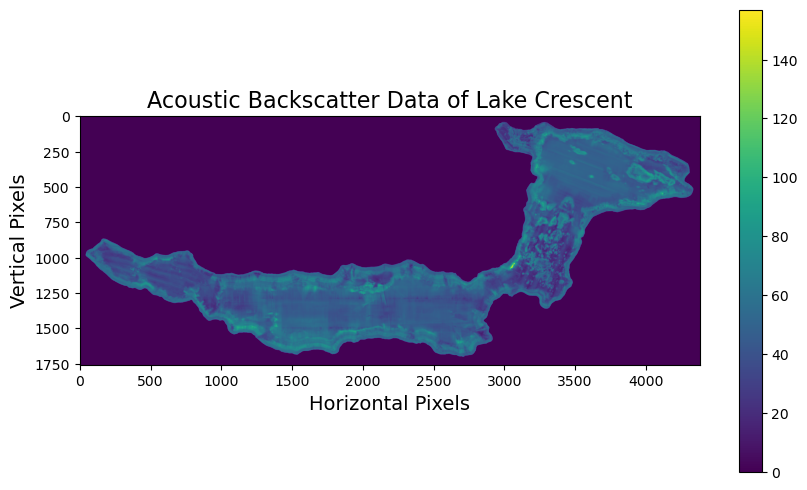

In [11]:
# Acoustic Backscatter Plot
fig,ax = plt.subplots(figsize = (10,6))
ax = plt.gca()

plt.imshow(img.read(1), cmap = 'viridis')
plt.colorbar()
plt.xlabel('Horizontal Pixels', fontsize = 14)
plt.ylabel('Vertical Pixels', fontsize = 14)
plt.title('Acoustic Backscatter Data of Lake Crescent', fontsize = 16)